<a href="https://colab.research.google.com/github/ToonToonToon/229352-Statical-Learning-For-DataScience-2/blob/main/Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

- AdaBoost. Grid search over `n_estimators` and `learning_rate`.
- XGBoost. Grid search over `n_estimators`, `max_depth` and `learning_rate`.
- LightGBM. Grid search over `n_estimators`, `max_depth` and `learning_rate`.

In [21]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

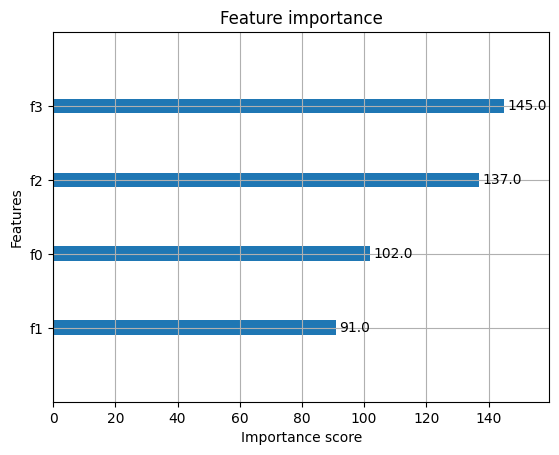

In [1]:
from xgboost import XGBClassifier, plot_importance

from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


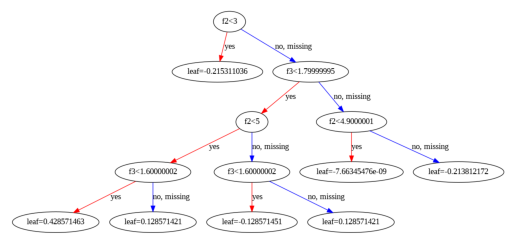

In [2]:
from xgboost import plot_tree

plot_tree(model, num_trees=1);

In [16]:
X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None).values.ravel() # ravel() เพื่อเปลี่ยนเป็น 1D array
X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None).values.ravel()

In [17]:
param_grids = {
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1]
        }
    }
}

In [18]:
best_overall_model = None
best_overall_score = 0

for name, config in param_grids.items():
    print(f"กำลังประมวลผล {name}...")
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)

    out_of_fold_acc = grid.best_score_
    print(f"{name} Best Out-of-fold Accuracy: {out_of_fold_acc:.4f}")

    if out_of_fold_acc > 0.83:
        print(f"--- ผ่านเกณฑ์! {name} ได้คะแนนเกิน 0.83 ---")

    if out_of_fold_acc > best_overall_score:
        best_overall_score = out_of_fold_acc
        best_overall_model = grid.best_estimator_
        best_model_name = name

กำลังประมวลผล AdaBoost...
AdaBoost Best Out-of-fold Accuracy: 0.8442
--- ผ่านเกณฑ์! AdaBoost ได้คะแนนเกิน 0.83 ---
กำลังประมวลผล XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:29:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:29:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:29:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:29:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:29:40] WARNING: /w

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [19]:
y_pred = best_overall_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"โมเดลที่ดีที่สุดคือ: {best_model_name}")
print(f"Test Accuracy: {test_acc:.4f}")


สรุปผล:
โมเดลที่ดีที่สุดคือ: AdaBoost
Test Accuracy: 0.8462


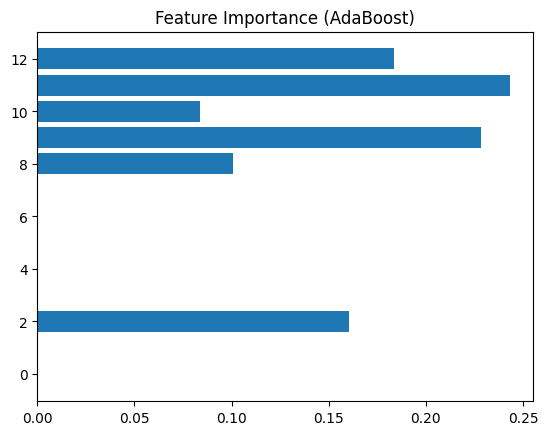

In [20]:
if best_model_name == 'AdaBoost':
    importance = best_overall_model.feature_importances_
    plt.barh(range(len(importance)), importance)
    plt.title(f"Feature Importance ({best_model_name})")
    plt.show()
else:
    plot_importance(best_overall_model)
    plt.title(f"Feature Importance ({best_model_name})")
    plt.show()